# Figure 1: Athletes Brain Study - Refactored

This notebook demonstrates the refactored, modular approach to generating Figure 1 for the athletes brain study.
The analysis has been organized into reusable modules within the `athletes_brain.fig1` package.

## Setup and Imports

Import the refactored modules from our package.

In [1]:
# Standard imports
from pathlib import Path
import pandas as pd
import numpy as np

# Import our refactored modules
from athletes_brain.fig1 import (
    Fig1Config,
    AthletesBrainDataLoader,
    GroupComparison,
    BrainPlotter,
    generate_figure1
)

# Import specific functions for focused analysis
from athletes_brain.fig1.main import (
    analyze_specific_comparison,
    get_most_significant_regions
)

2025-08-12 14:58:11.425 | INFO     | athletes_brain.config:<module>:11 - PROJ_ROOT path is: /home/groot/Projects/athletes_brain


## Configuration

Set up the configuration and visualization settings.

In [2]:
# Initialize configuration
config = Fig1Config()

# Set up matplotlib configuration for consistent plots
config.setup_matplotlib_config()

# Display configuration
print(f"Atlas: {config.ATLAS}")
print(f"Metrics: {config.METRICS}")
print(f"Group labels: {config.CLIMBER_GROUP_LABEL}, {config.BJJ_GROUP_LABEL}, {config.CONTROL_GROUP_LABEL}")
print(f"P-value threshold: {config.P_THRESHOLD}")
print(f"Visualization range: [{config.VMIN}, {config.VMAX}]")

Atlas: schaefer2018tian2020_400_7
Metrics: ['gm_vol', 'adc']
Group labels: Climbing, Bjj, Control
P-value threshold: 0.05
Visualization range: [-5, 5]


## Quick Analysis: Generate Complete Figure 1

Use the main function to generate all comparisons and visualizations.

In [3]:
# Generate complete Figure 1
output_dir = Path.home() / "Projects" / "athletes_brain" / "figures" / "fig1_refactored"
# generate_figure1(output_dir=output_dir, config=config)

## Step-by-Step Analysis

For more control, we can run each step individually using the modular components.

### 1. Data Loading

In [4]:
# Initialize data loader
data_loader = AthletesBrainDataLoader(config)

# Load all data
metric_data, parcels, nifti_path, nifti_matlab_path = data_loader.load_all_data()

print(f"Loaded {len(metric_data)} metrics")
print(f"Loaded {len(parcels)} brain parcels")
print(f"Metrics: {list(metric_data.keys())}")

# Display sample data (demographics)
d = metric_data["gm_vol"].drop_duplicates(subset=["subject_code"], keep="first")
print(f"N participants: {d.shape[0]}")


2025-08-12 14:58:12.788 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:48 - Loading metric data...
2025-08-12 14:58:12.788 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:54 - Loading gm_vol data


/home/groot/Projects/athletes_brain/athletes_brain/fig1/data_loader.py:57: DtypeWarning: Columns (1,8,9,10,11,12,68,74,78,79,80,81,82,84,85,86,87,92,93,94,95,96,97,99,113,116,121,122,123,124,125,132,133,134) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(self.processed_dir / f"{metric}.csv", index_col=0).reset_index(


2025-08-12 14:58:20.134 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:74 - Loaded 472498 records for gm_vol
2025-08-12 14:58:20.134 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:54 - Loading adc data


/home/groot/Projects/athletes_brain/athletes_brain/fig1/data_loader.py:57: DtypeWarning: Columns (16,23,24,25,26,27,33,39,43,44,45,46,47,49,50,51,52,57,58,59,60,61,62,64,78,81,86,87,88,89,96,97,98) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(self.processed_dir / f"{metric}.csv", index_col=0).reset_index(


2025-08-12 14:58:25.776 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:74 - Loaded 494664 records for adc
2025-08-12 14:58:25.776 | SUCCESS  | athletes_brain.fig1.data_loader:load_metric_data:76 - Successfully loaded 2 metrics
2025-08-12 14:58:25.776 | INFO     | athletes_brain.fig1.data_loader:load_atlas_data:32 - Loading atlas data for schaefer2018tian2020_400_7
2025-08-12 14:58:25.778 | INFO     | athletes_brain.fig1.data_loader:load_atlas_data:39 - Loaded 454 parcels from atlas
Loaded 2 metrics
Loaded 454 brain parcels
Metrics: ['gm_vol', 'adc']
N participants: 1050


### 2. Statistical Analysis

In [5]:
# Initialize group comparison analyzer
group_comparison = GroupComparison(config)

# Perform athletes vs controls comparison
athletes_vs_controls_results = group_comparison.athletes_vs_controls(metric_data, parcels)

print(f"Completed athletes vs controls analysis for {len(athletes_vs_controls_results)} metrics")

# Display most significant results for gray matter volume
gm_results = athletes_vs_controls_results['gm_vol'].sort_values('adjusted_p_value')
print("\nMost significant regions for gray matter volume (athletes vs controls):")
gm_results.head(10)

2025-08-12 14:58:25.796 | INFO     | athletes_brain.fig1.statistical_analysis:athletes_vs_controls:195 - Starting athletes vs controls comparison
2025-08-12 14:58:25.797 | INFO     | athletes_brain.fig1.statistical_analysis:athletes_vs_controls:199 - Analyzing metric: gm_vol
2025-08-12 14:58:35.145 | INFO     | athletes_brain.fig1.statistical_analysis:athletes_vs_controls:199 - Analyzing metric: adc
2025-08-12 14:58:43.147 | SUCCESS  | athletes_brain.fig1.statistical_analysis:athletes_vs_controls:229 - Completed athletes vs controls comparison for 2 metrics
Completed athletes vs controls analysis for 2 metrics

Most significant regions for gray matter volume (athletes vs controls):


index                    name            base_name           Label Name  \
61      62  7Networks_LH_SomMot_31  7networks_lh_sommot  7Networks_LH_SomMot   
63      64  7Networks_LH_SomMot_33  7networks_lh_sommot  7Networks_LH_SomMot   
267    268  7Networks_RH_SomMot_38  7networks_rh_sommot  7Networks_RH_SomMot   
268    269  7Networks_RH_SomMot_39  7networks_rh_sommot  7Networks_RH_SomMot   
212    213     7Networks_RH_Vis_13     7networks_rh_vis     7Networks_RH_Vis   
259    260  7Networks_RH_SomMot_30  7networks_rh_sommot  7Networks_RH_SomMot   
262    263  7Networks_RH_SomMot_33  7networks_rh_sommot  7Networks_RH_SomMot   
20      21     7Networks_LH_Vis_21     7networks_lh_vis     7Networks_LH_Vis   
203    204      7Networks_RH_Vis_4     7networks_rh_vis     7Networks_RH_Vis   
10      11     7Networks_LH_Vis_11     7networks_lh_vis     7Networks_LH_Vis   

         network    component hemisphere  F_statistic   p_value  coefficient  \
61   somatomotor  somatomotor          L    11.997367  0.000555    16.092607   
63   somatomotor  somatomotor          L    11.590247  0.000688    45.091963   
267  somatomotor  somatomotor          R     9.732698  0.001860    34.471356   
268  somatomotor  somatomotor          R    10.545423  0.001202    32.129433   
212       visual       visual          R    10.012696  0.001600    59.843265   
259  somatomotor  somatomotor          R     8.937336  0.002860    32.081803   
262  somatomotor  somatomotor          R     9.103665  0.002613    15.835117   
20        visual       visual          L     7.446377  0.006464    58.868828   
203       visual       visual          R     7.394860  0.006651    51.307357   
10        visual       visual          L     7.172411  0.007521    41.333412   

       std_err  t_statistic    True_Mean   False_Mean  adjusted_p_value  
61    4.646045     3.463722   374.735256   351.027954          0.156276  
63   13.245025     3.404445  1213.847704  1150.876843          0.156276  
267  11.049477     3.119727   926.348715   874.000829          0.168912  
268   9.893981     3.247372   679.473721   625.919664          0.168912  
212  18.912100     3.164284  1320.133586  1197.518575          0.168912  
259  10.731359     2.989538   975.137139   927.911180          0.185498  
262   5.248233     3.017228   385.914501   362.924850          0.185498  
20   21.573115     2.728805  1976.823065  1851.701804          0.284533  
203  18.867513     2.719349  1718.366376  1597.874109          0.284533  
10   15.433650     2.678136  1408.149420  1315.002519          0.284533

### 3. Sport-Specific Comparisons

In [6]:
# Compare climbers vs controls
climbers_vs_controls_results = group_comparison.sport_vs_controls(
    metric_data, parcels, config.CLIMBER_GROUP_LABEL
)

# Compare BJJ vs controls  
bjj_vs_controls_results = group_comparison.sport_vs_controls(
    metric_data, parcels, config.BJJ_GROUP_LABEL
)

# Compare climbers vs BJJ
climbers_vs_bjj_results = group_comparison.climbers_vs_bjj(metric_data, parcels)

print(f"Completed climbers vs controls: {len(climbers_vs_controls_results)} metrics")
print(f"Completed BJJ vs controls: {len(bjj_vs_controls_results)} metrics")
print(f"Completed climbers vs BJJ: {len(climbers_vs_bjj_results)} metrics")

2025-08-12 14:58:43.232 | INFO     | athletes_brain.fig1.statistical_analysis:sport_vs_controls:245 - Starting Climbing vs controls comparison
2025-08-12 14:58:43.232 | INFO     | athletes_brain.fig1.statistical_analysis:sport_vs_controls:249 - Analyzing Climbing vs controls for gm_vol
2025-08-12 14:58:51.707 | INFO     | athletes_brain.fig1.statistical_analysis:sport_vs_controls:249 - Analyzing Climbing vs controls for adc
2025-08-12 14:58:59.542 | SUCCESS  | athletes_brain.fig1.statistical_analysis:sport_vs_controls:289 - Completed Climbing vs controls comparison for 2 metrics
2025-08-12 14:58:59.607 | INFO     | athletes_brain.fig1.statistical_analysis:sport_vs_controls:245 - Starting Bjj vs controls comparison
2025-08-12 14:58:59.607 | INFO     | athletes_brain.fig1.statistical_analysis:sport_vs_controls:249 - Analyzing Bjj vs controls for gm_vol
2025-08-12 14:59:07.777 | INFO     | athletes_brain.fig1.statistical_analysis:sport_vs_controls:249 - Analyzing Bjj vs controls for adc
2

### 4. Brain Visualization

In [7]:
# Initialize brain plotter
brain_plotter = BrainPlotter(config)

# Set up surfaces (this will download/cache surface data if needed)
brain_plotter.setup_surfaces()

2025-08-12 14:59:24.416 | INFO     | athletes_brain.fig1.brain_visualization:setup_surfaces:31 - Setting up brain surfaces and parcellations
2025-08-12 14:59:24.420 | SUCCESS  | athletes_brain.fig1.brain_visualization:setup_surfaces:40 - Brain surfaces and parcellations loaded successfully


2025-08-12 14:59:24.476 | INFO     | athletes_brain.fig1.brain_visualization:create_brain_plots:233 - Creating brain plots for athletes_vs_controls
2025-08-12 14:59:24.476 | INFO     | athletes_brain.fig1.brain_visualization:create_brain_plots:239 - Processing gm_vol for athletes_vs_controls
2025-08-12 14:59:24.477 | INFO     | athletes_brain.fig1.brain_visualization:prepare_value_maps:58 - Preparing value maps for t_statistic
2025-08-12 14:59:24.490 | INFO     | athletes_brain.fig1.brain_visualization:prepare_value_maps:98 - Prepared maps with 200 LH, 200 RH, and 54 subcortical regions
2025-08-12 14:59:24.491 | INFO     | athletes_brain.fig1.brain_visualization:plot_cortical_surface:122 - Creating cortical surface plots
2025-08-12 14:59:24.500 | INFO     | athletes_brain.fig1.brain_visualization:plot_cortical_surface:144 - Plotting left hemisphere
2025-08-12 14:59:25.570 | INFO     | athletes_brain.fig1.brain_visualization:plot_cortical_surface:178 - Saved left hemisphere plot to /hom

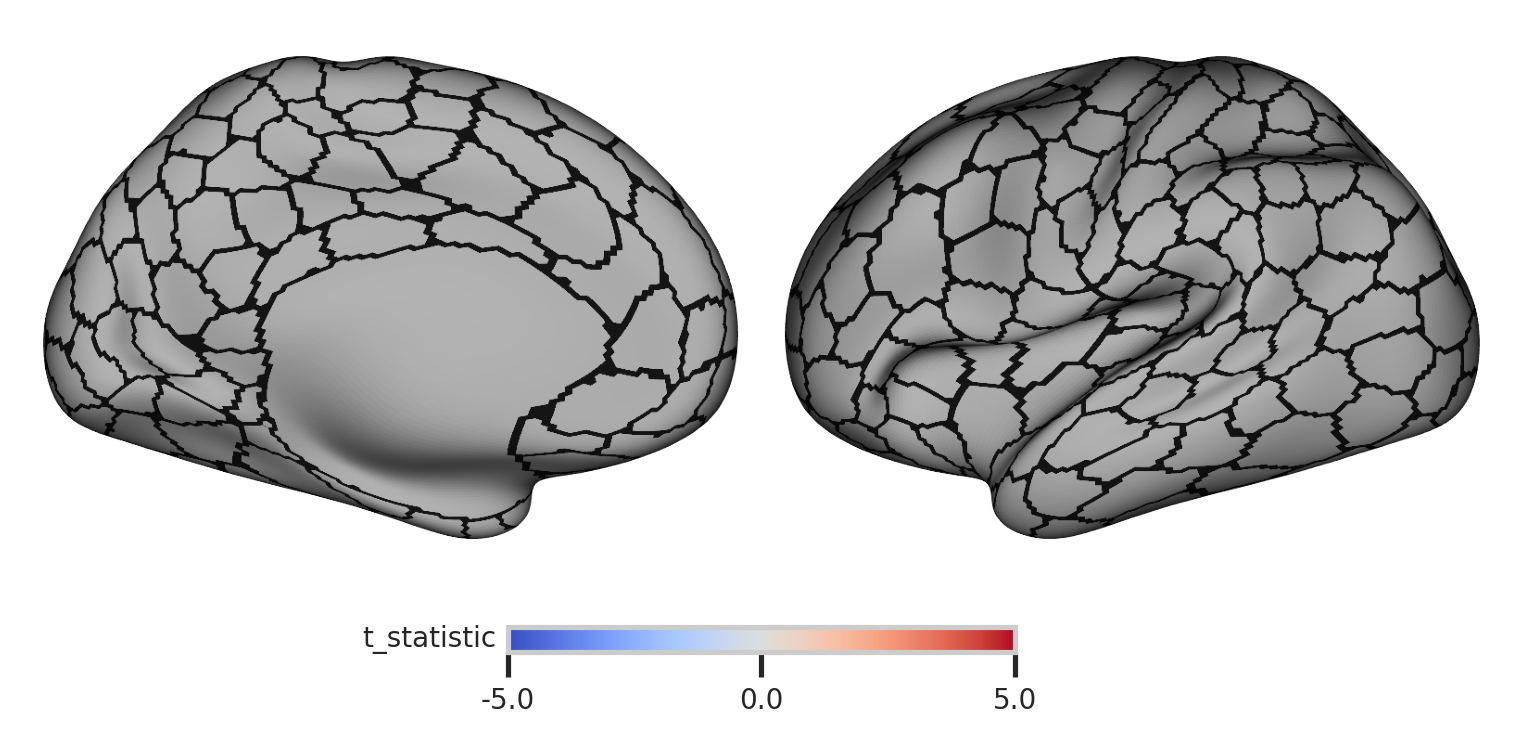

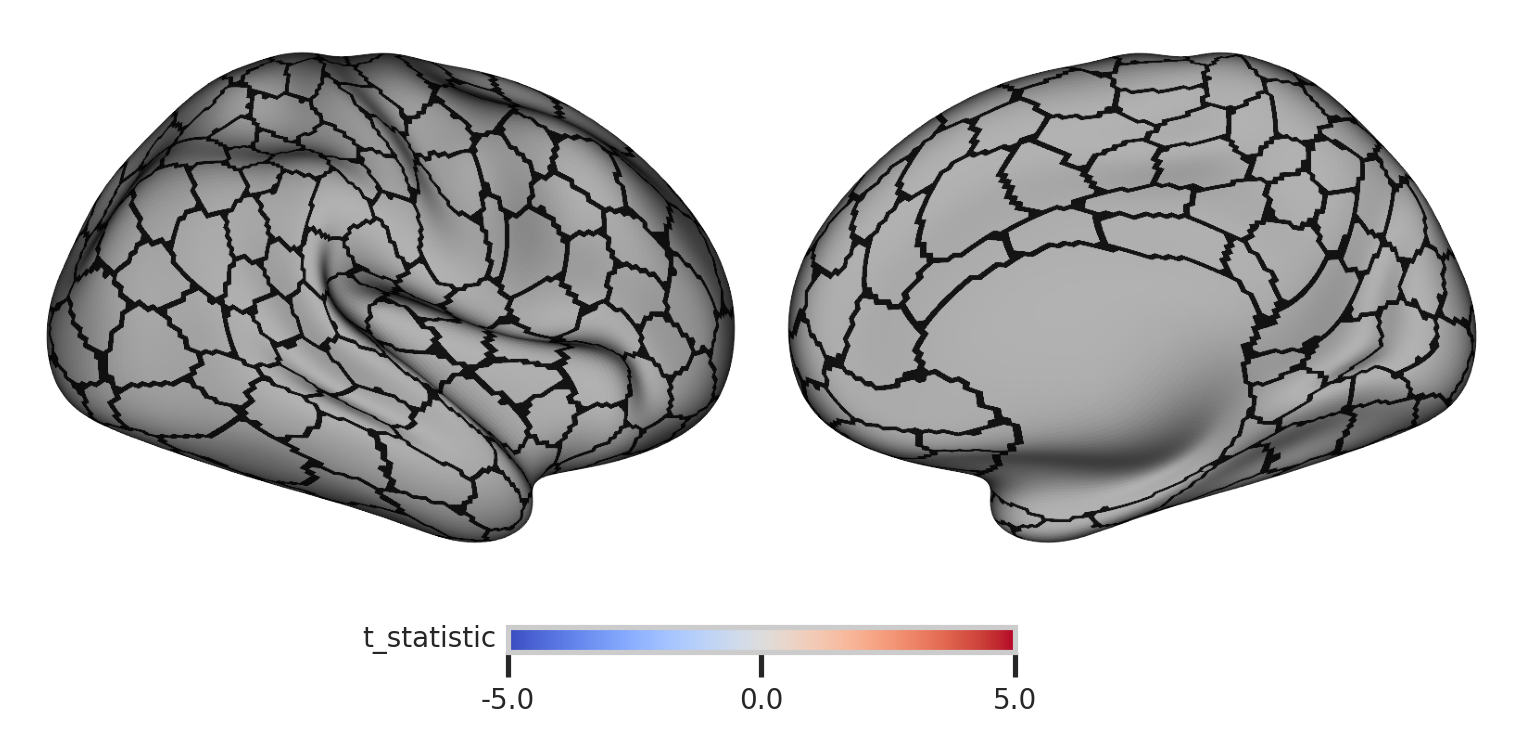

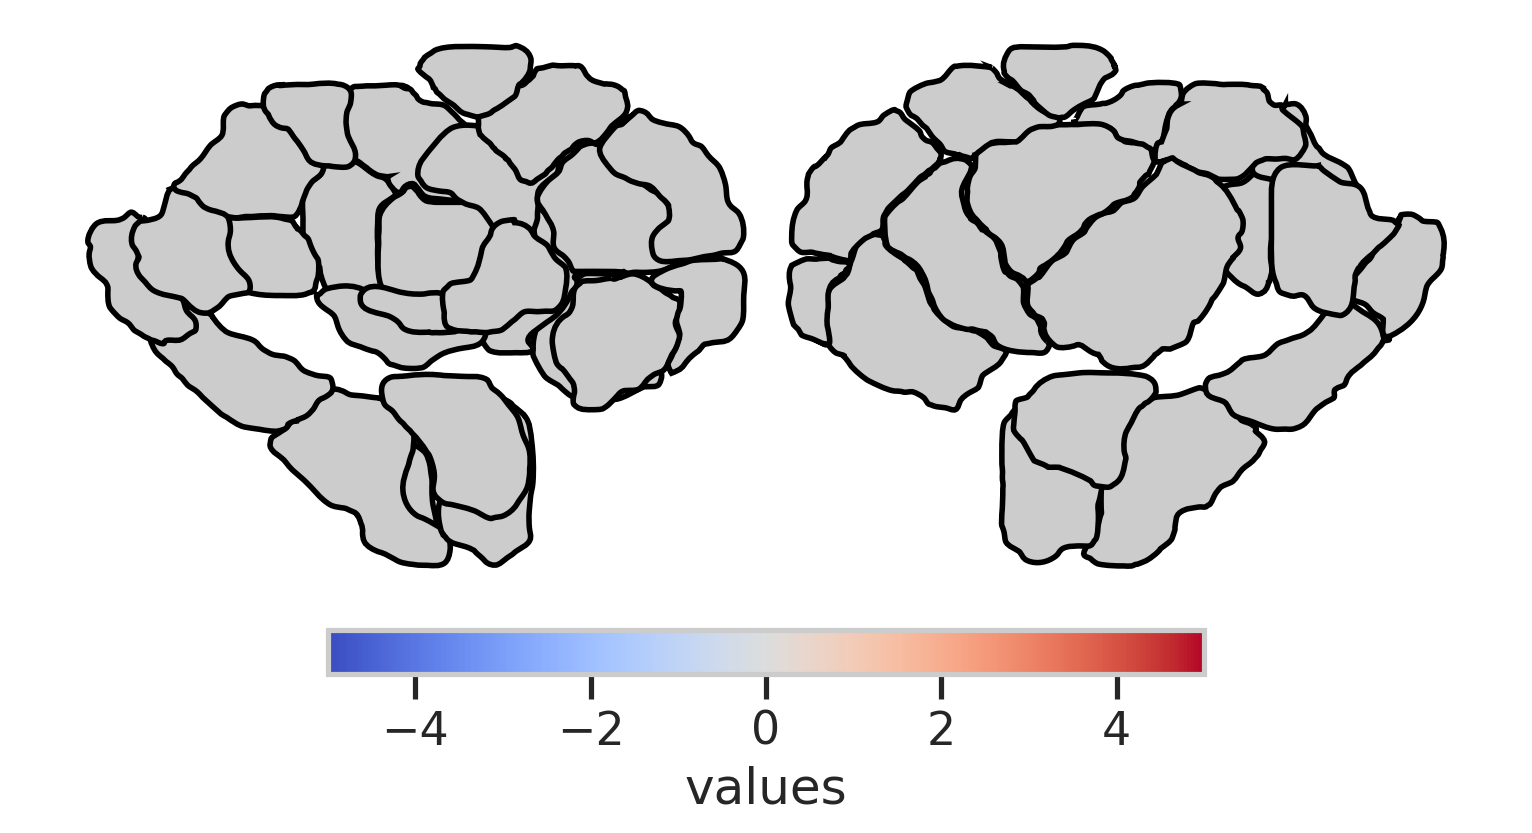

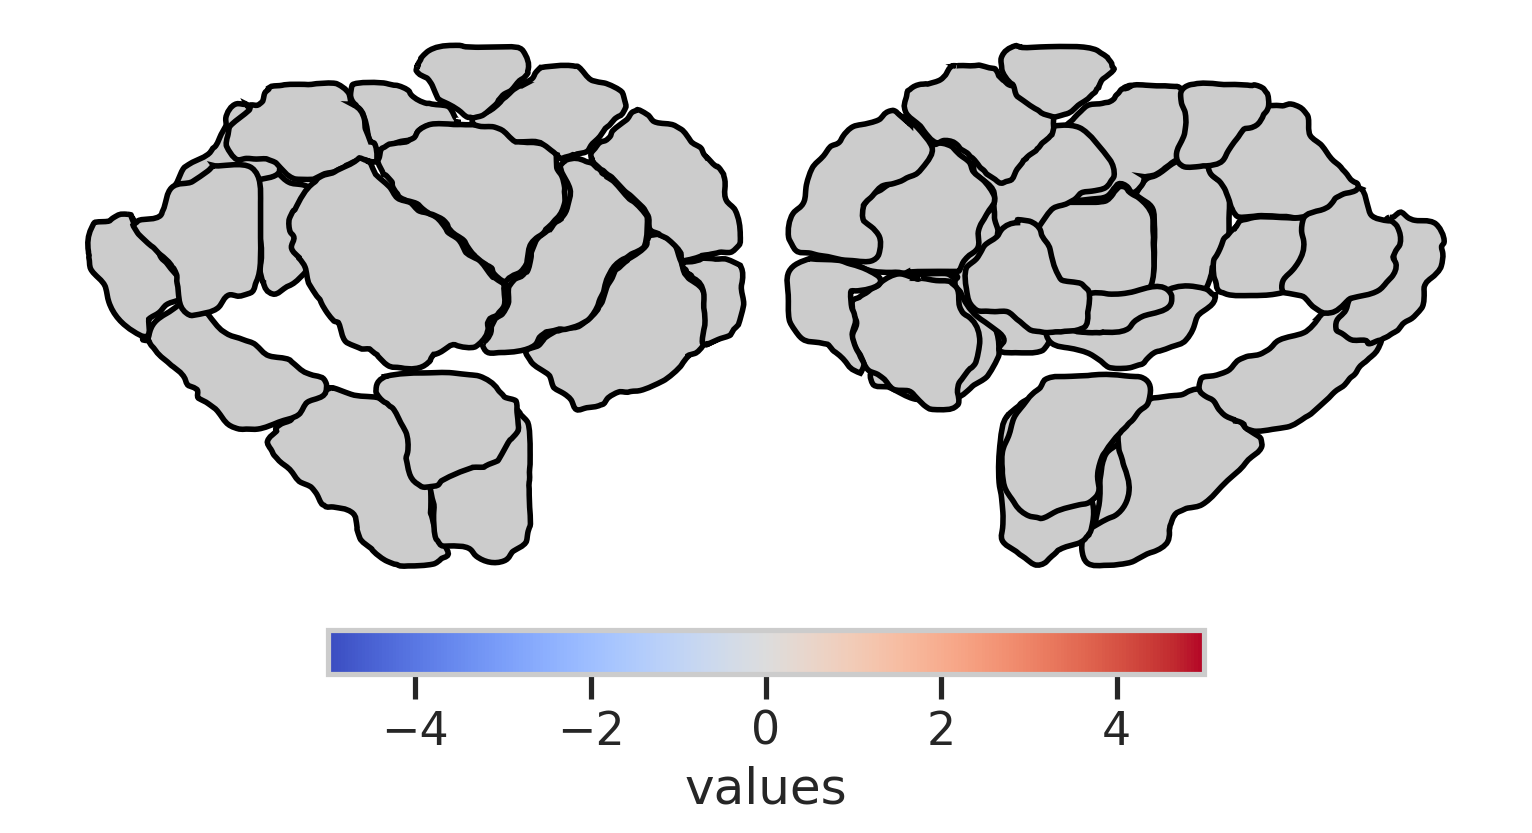

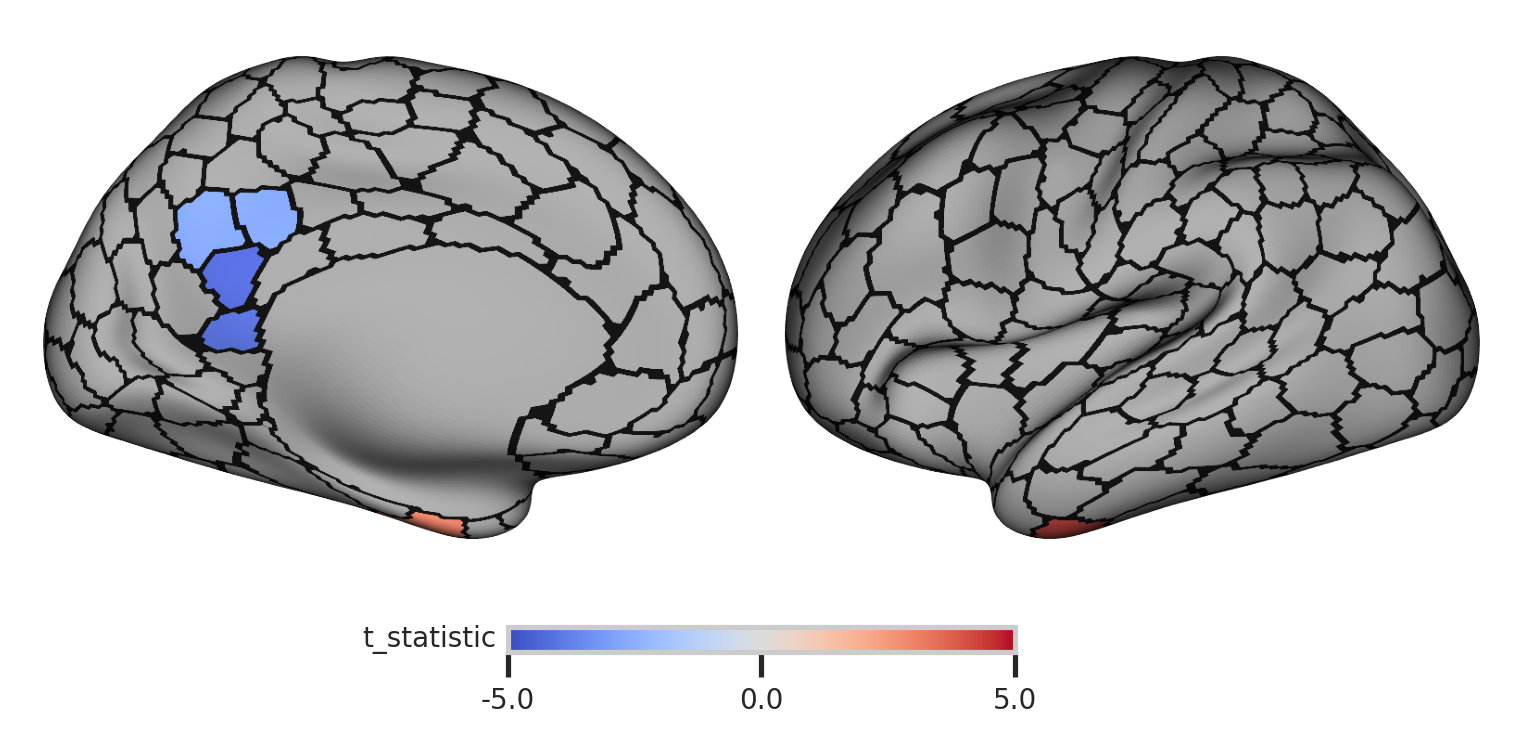

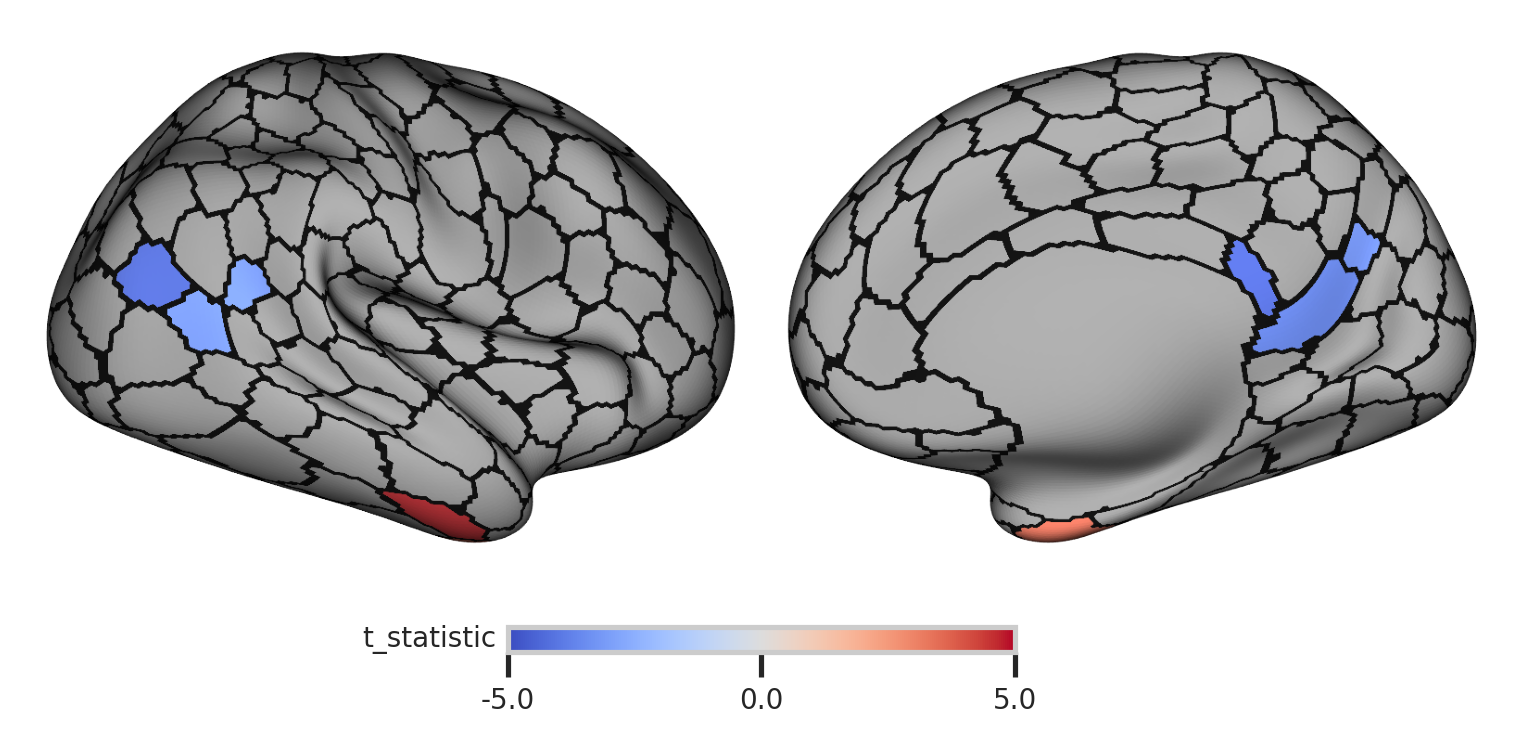

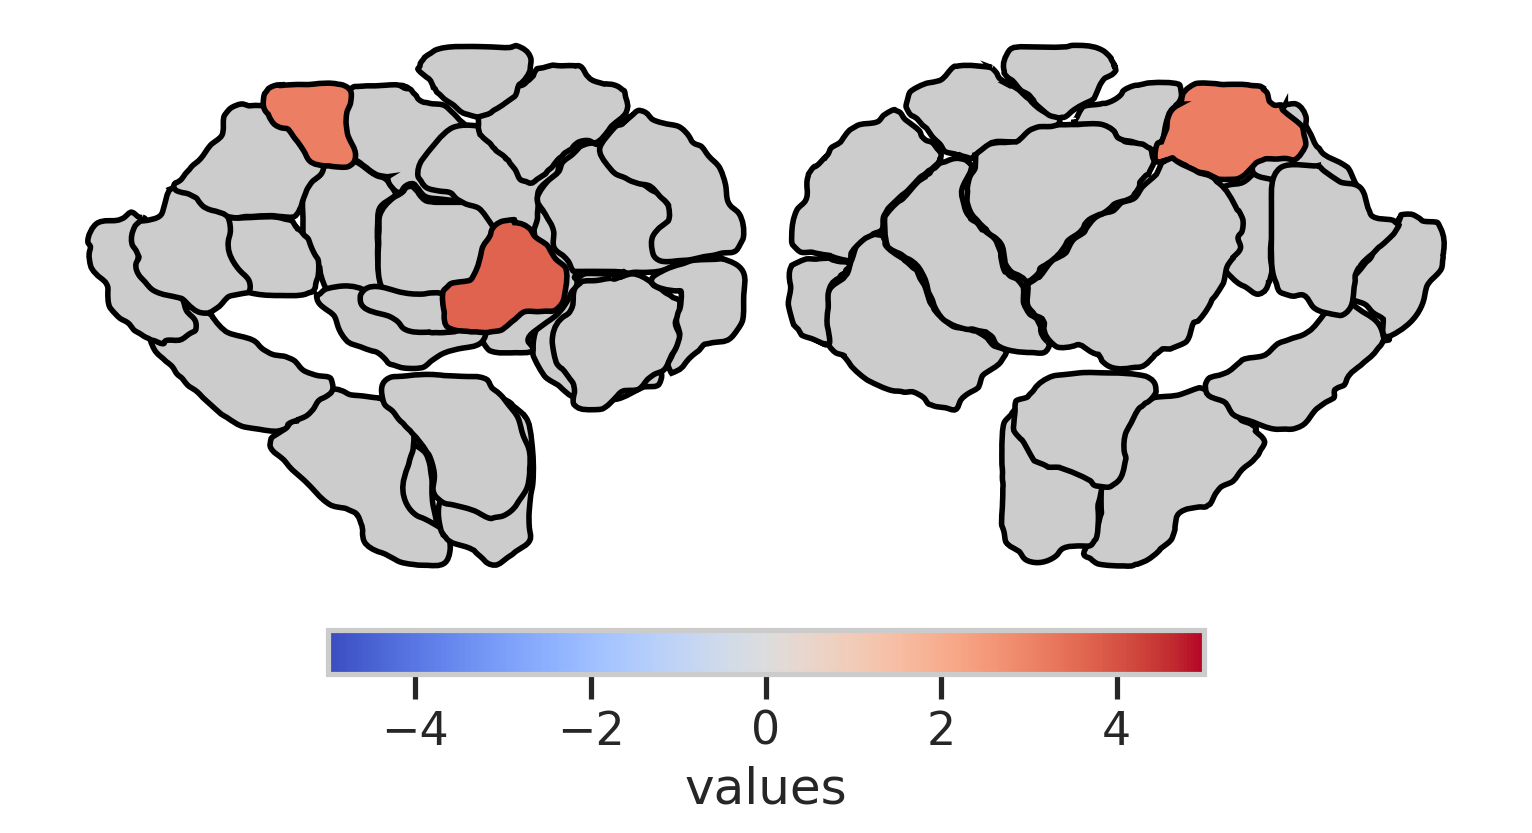

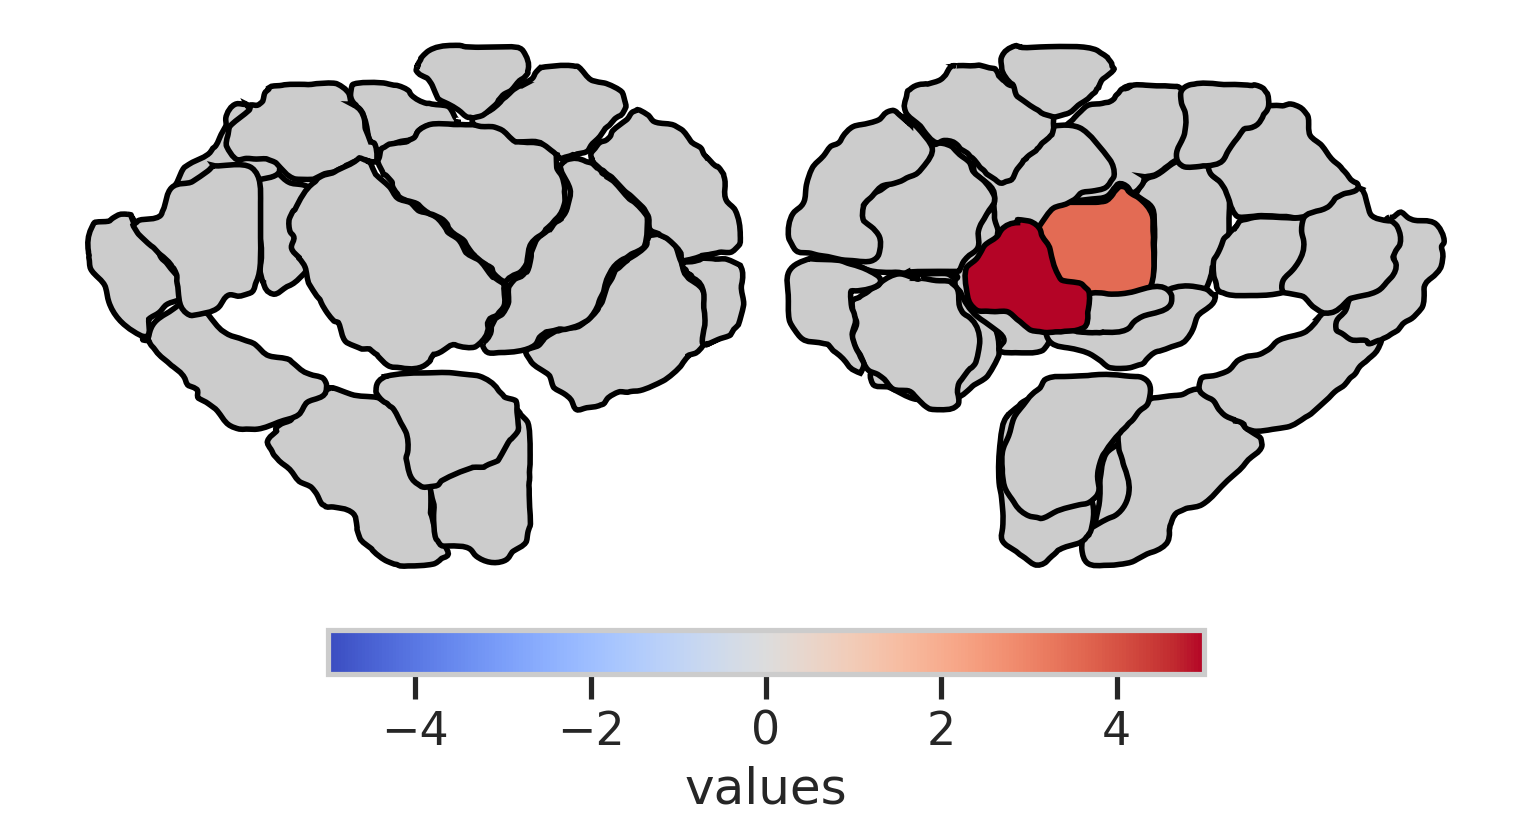

In [8]:
# Create brain plots for athletes vs controls
output_dir = data_loader.get_output_directory("fig1_step_by_step")

brain_plotter.create_brain_plots(
    athletes_vs_controls_results,
    "athletes_vs_controls",
    output_dir
)

print(f"Brain plots saved to: {output_dir / 'athletes_vs_controls'}")

## Focused Analysis: Single Metric

Analyze a specific metric and comparison in detail.

2025-08-12 14:59:34.803 | INFO     | athletes_brain.fig1.main:analyze_specific_comparison:106 - Analyzing athletes_vs_controls for adc
2025-08-12 14:59:34.803 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:48 - Loading metric data...
2025-08-12 14:59:34.803 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:54 - Loading gm_vol data


/home/groot/Projects/athletes_brain/athletes_brain/fig1/data_loader.py:57: DtypeWarning: Columns (1,8,9,10,11,12,68,74,78,79,80,81,82,84,85,86,87,92,93,94,95,96,97,99,113,116,121,122,123,124,125,132,133,134) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(self.processed_dir / f"{metric}.csv", index_col=0).reset_index(


2025-08-12 14:59:41.556 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:74 - Loaded 472498 records for gm_vol
2025-08-12 14:59:41.556 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:54 - Loading adc data


/home/groot/Projects/athletes_brain/athletes_brain/fig1/data_loader.py:57: DtypeWarning: Columns (16,23,24,25,26,27,33,39,43,44,45,46,47,49,50,51,52,57,58,59,60,61,62,64,78,81,86,87,88,89,96,97,98) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(self.processed_dir / f"{metric}.csv", index_col=0).reset_index(


2025-08-12 14:59:46.686 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:74 - Loaded 494664 records for adc
2025-08-12 14:59:46.686 | SUCCESS  | athletes_brain.fig1.data_loader:load_metric_data:76 - Successfully loaded 2 metrics
2025-08-12 14:59:46.686 | INFO     | athletes_brain.fig1.data_loader:load_atlas_data:32 - Loading atlas data for schaefer2018tian2020_400_7
2025-08-12 14:59:46.689 | INFO     | athletes_brain.fig1.data_loader:load_atlas_data:39 - Loaded 454 parcels from atlas
2025-08-12 14:59:46.689 | INFO     | athletes_brain.fig1.statistical_analysis:athletes_vs_controls:195 - Starting athletes vs controls comparison
2025-08-12 14:59:46.689 | INFO     | athletes_brain.fig1.statistical_analysis:athletes_vs_controls:199 - Analyzing metric: gm_vol
2025-08-12 14:59:55.047 | INFO     | athletes_brain.fig1.statistical_analysis:athletes_vs_controls:199 - Analyzing metric: adc
2025-08-12 15:00:02.727 | SUCCESS  | athletes_brain.fig1.statistical_analysis:athletes_vs_contr

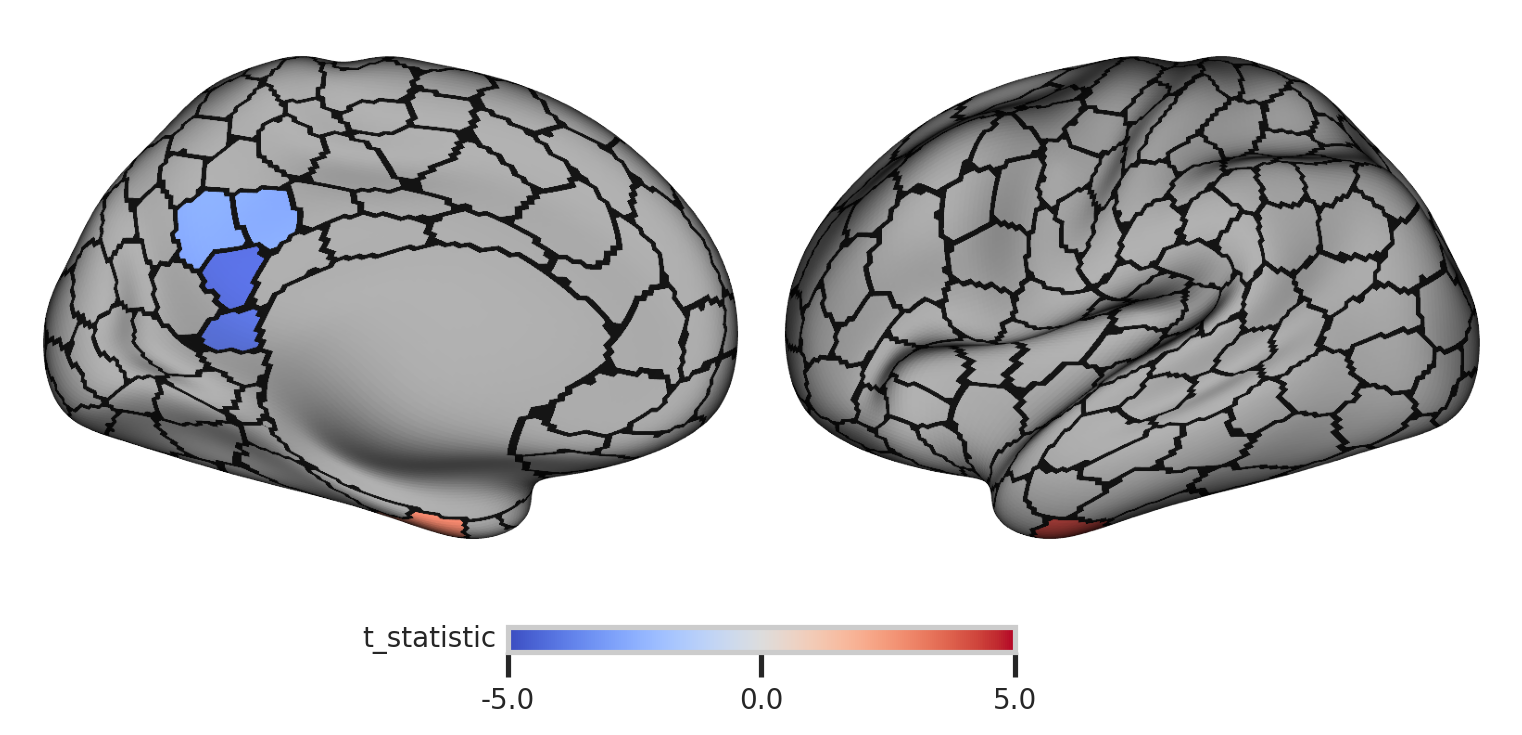

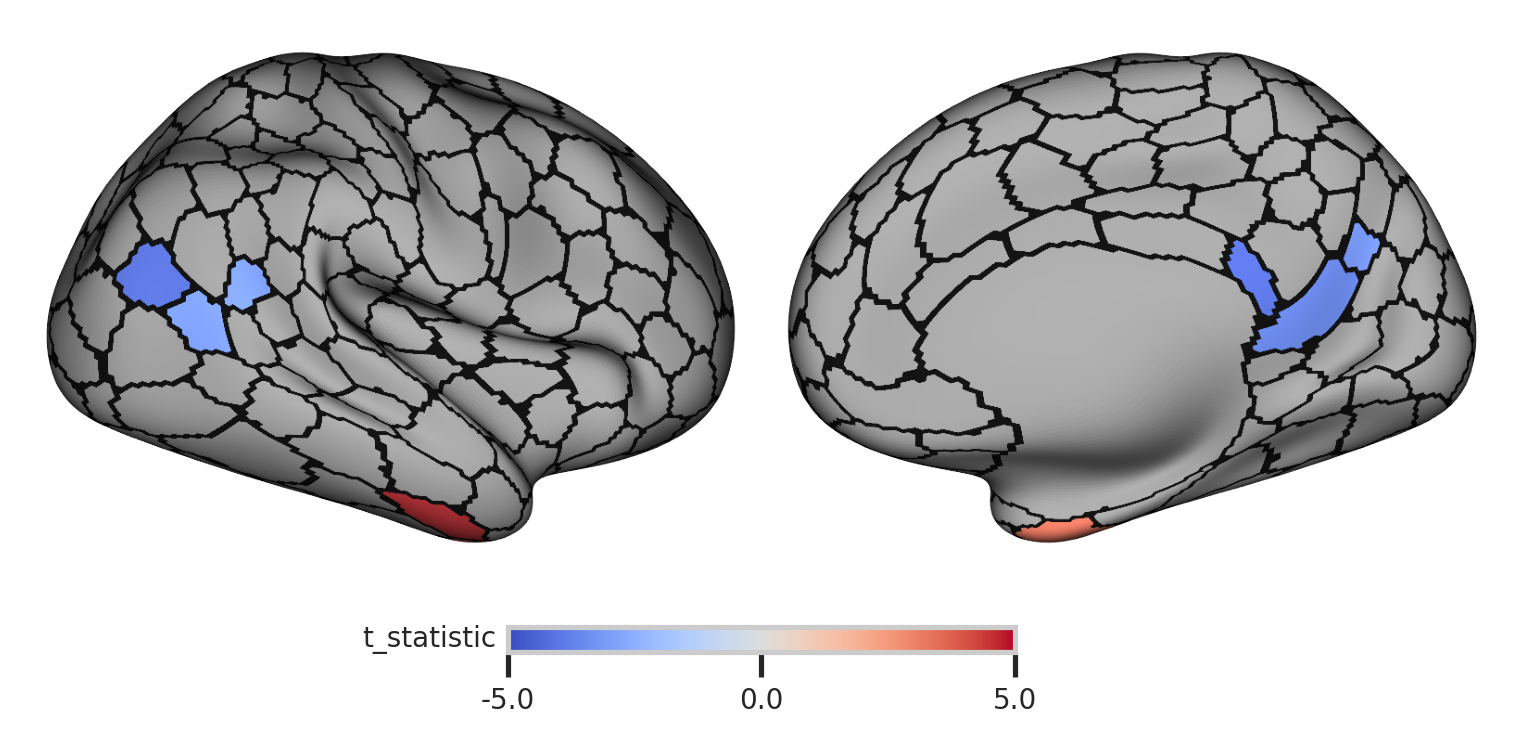

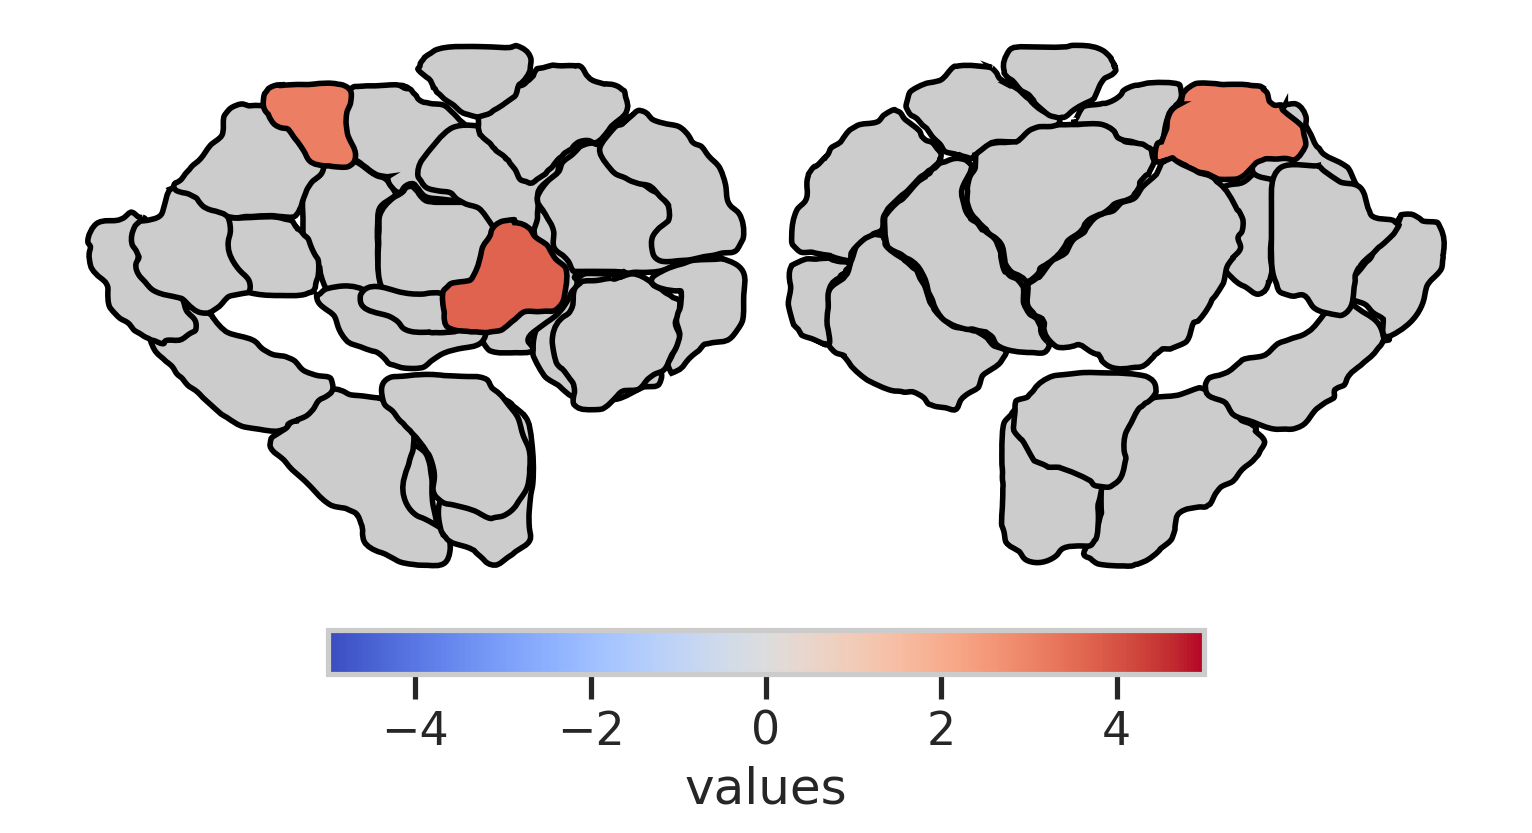

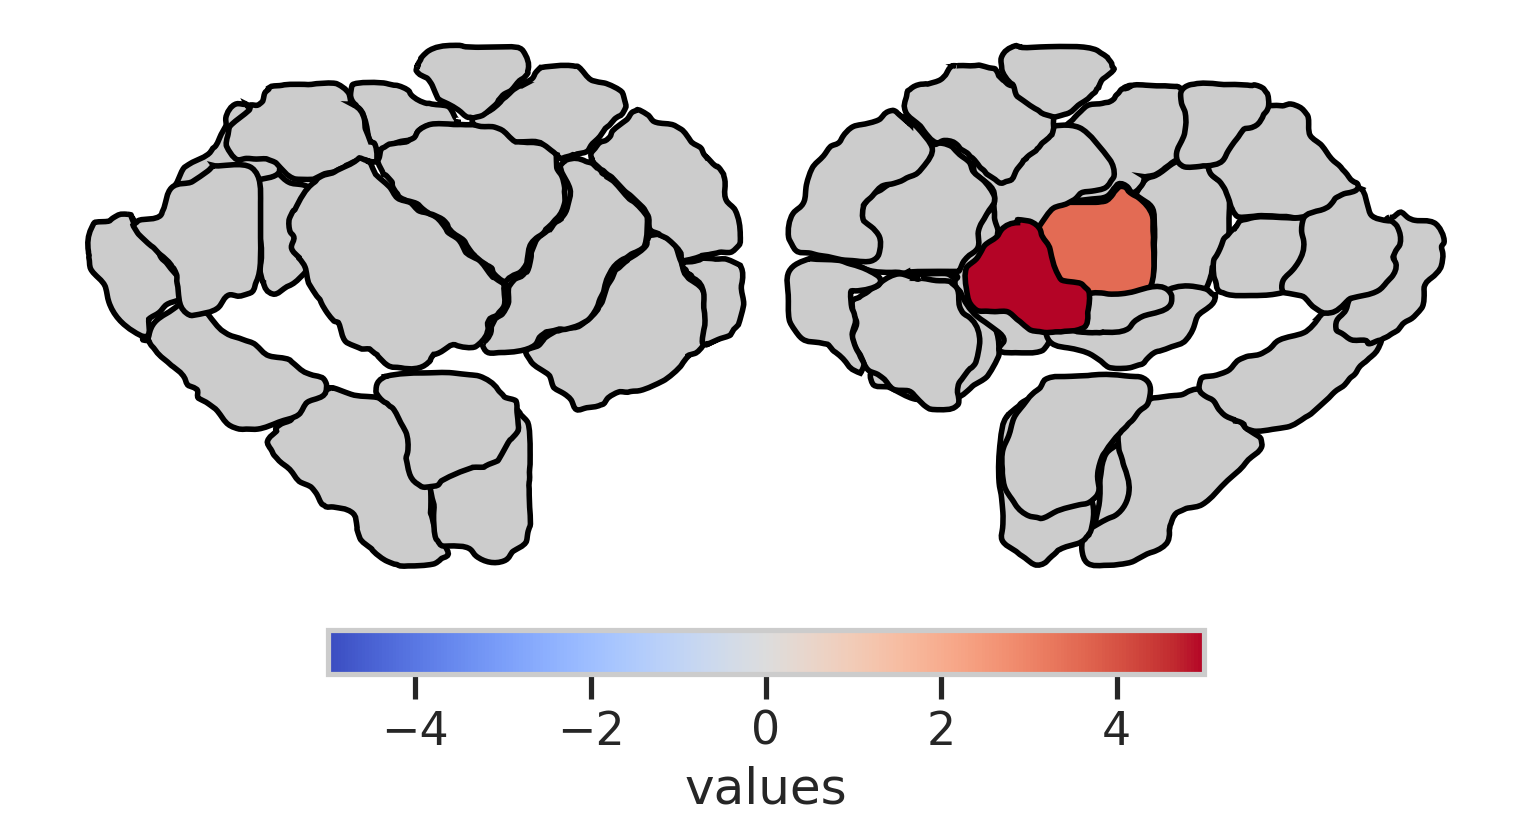

In [9]:
# Analyze ADC for athletes vs controls
analyze_specific_comparison(
    comparison_type="athletes_vs_controls",
    metric="adc",
    output_dir=output_dir,
    config=config
)

In [10]:
# Get most significant regions for gray matter volume
most_significant = get_most_significant_regions(
    comparison_type="athletes_vs_controls",
    metric="gm_vol",
    n_regions=10,
    config=config
)

2025-08-12 15:00:08.155 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:48 - Loading metric data...
2025-08-12 15:00:08.155 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:54 - Loading gm_vol data


/home/groot/Projects/athletes_brain/athletes_brain/fig1/data_loader.py:57: DtypeWarning: Columns (1,8,9,10,11,12,68,74,78,79,80,81,82,84,85,86,87,92,93,94,95,96,97,99,113,116,121,122,123,124,125,132,133,134) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(self.processed_dir / f"{metric}.csv", index_col=0).reset_index(


2025-08-12 15:00:14.488 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:74 - Loaded 472498 records for gm_vol
2025-08-12 15:00:14.488 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:54 - Loading adc data


/home/groot/Projects/athletes_brain/athletes_brain/fig1/data_loader.py:57: DtypeWarning: Columns (16,23,24,25,26,27,33,39,43,44,45,46,47,49,50,51,52,57,58,59,60,61,62,64,78,81,86,87,88,89,96,97,98) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(self.processed_dir / f"{metric}.csv", index_col=0).reset_index(


2025-08-12 15:00:19.684 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:74 - Loaded 494664 records for adc
2025-08-12 15:00:19.684 | SUCCESS  | athletes_brain.fig1.data_loader:load_metric_data:76 - Successfully loaded 2 metrics
2025-08-12 15:00:19.684 | INFO     | athletes_brain.fig1.data_loader:load_atlas_data:32 - Loading atlas data for schaefer2018tian2020_400_7
2025-08-12 15:00:19.686 | INFO     | athletes_brain.fig1.data_loader:load_atlas_data:39 - Loaded 454 parcels from atlas
2025-08-12 15:00:19.686 | INFO     | athletes_brain.fig1.statistical_analysis:athletes_vs_controls:195 - Starting athletes vs controls comparison
2025-08-12 15:00:19.686 | INFO     | athletes_brain.fig1.statistical_analysis:athletes_vs_controls:199 - Analyzing metric: gm_vol
2025-08-12 15:00:28.050 | INFO     | athletes_brain.fig1.statistical_analysis:athletes_vs_controls:199 - Analyzing metric: adc
2025-08-12 15:00:35.975 | SUCCESS  | athletes_brain.fig1.statistical_analysis:athletes_vs_contr

## Custom Visualization for Specific Results

In [11]:
# Create custom visualization for a specific metric
metric_key = "adc"
results_df = athletes_vs_controls_results[metric_key]

In [12]:
results_df.sort_values(by="adjusted_p_value").head(20)

index                            name                     base_name  \
426    427                          aGP-rh                           aGP   
325    326  7Networks_RH_Limbic_TempPole_2  7networks_rh_limbic_temppole   
191    192  7Networks_LH_Default_pCunPCC_3  7networks_lh_default_pcunpcc   
392    393  7Networks_RH_Default_pCunPCC_2  7networks_rh_default_pcunpcc   
189    190  7Networks_LH_Default_pCunPCC_1  7networks_lh_default_pcunpcc   
118    119  7Networks_LH_Limbic_TempPole_1  7networks_lh_limbic_temppole   
362    363      7Networks_RH_Default_Par_2      7networks_rh_default_par   
391    392  7Networks_RH_Default_pCunPCC_1  7networks_rh_default_pcunpcc   
453    454                          aGP-lh                           aGP   
403    404                     THA-VAia-rh                      THA-VAia   
324    325  7Networks_RH_Limbic_TempPole_1  7networks_rh_limbic_temppole   
393    394  7Networks_RH_Default_pCunPCC_3  7networks_rh_default_pcunpcc   
120    121  7Networks_LH_Limbic_TempPole_3  7networks_lh_limbic_temppole   
194    195  7Networks_LH_Default_pCunPCC_6  7networks_lh_default_pcunpcc   
195    196  7Networks_LH_Default_pCunPCC_7  7networks_lh_default_pcunpcc   
272    273    7Networks_RH_DorsAttn_Post_3    7networks_rh_dorsattn_post   
361    362      7Networks_RH_Default_Par_1      7networks_rh_default_par   
438    439                      THA-DAl-lh                       THA-DAl   
190    191  7Networks_LH_Default_pCunPCC_2  7networks_lh_default_pcunpcc   
394    395  7Networks_RH_Default_pCunPCC_4  7networks_rh_default_pcunpcc   

                                            Label Name           network  \
426                            Pallidum, anterior part         subcortex   
325                       7Networks_RH_Limbic_TempPole            limbic   
191                       7Networks_LH_Default_pCunPCC           default   
392                       7Networks_RH_Default_pCunPCC           default   
189                       7Networks_LH_Default_pCunPCC           default   
118                       7Networks_LH_Limbic_TempPole            limbic   
362                           7Networks_RH_Default_Par           default   
391                       7Networks_RH_Default_pCunPCC           default   
453                            Pallidum, anterior part         subcortex   
403  Thalamus, inferior ventro-anterior part, anter...         subcortex   
324                       7Networks_RH_Limbic_TempPole            limbic   
393                       7Networks_RH_Default_pCunPCC           default   
120                       7Networks_LH_Limbic_TempPole            limbic   
194                       7Networks_LH_Default_pCunPCC           default   
195                       7Networks_LH_Default_pCunPCC           default   
272                         7Networks_RH_DorsAttn_Post  dorsal attention   
361                           7Networks_RH_Default_Par           default   
438              Thalamus, lateral dorso-anterior part         subcortex   
190                       7Networks_LH_Default_pCunPCC           default   
394                       7Networks_RH_Default_pCunPCC           default   

                                component hemisphere  F_statistic  \
426                              Pallidum          R    37.281463   
325                         temporal pole          R    21.758090   
191  precuneus posterior cingulate cortex          L    21.000084   
392  precuneus posterior cingulate cortex          R    19.089103   
189  precuneus posterior cingulate cortex          L    19.160057   
118                         temporal pole          L    18.549187   
362                              parietal          R    17.865704   
391  precuneus posterior cingulate cortex          R    13.932999   
453                              Pallidum          L    13.672592   
403                              Thalamus          R    12.432416   
324                         temporal pole          R

2025-08-12 15:00:36.421 | INFO     | athletes_brain.fig1.brain_visualization:plot_single_metric:277 - Creating brain plots for adc
2025-08-12 15:00:36.421 | INFO     | athletes_brain.fig1.brain_visualization:prepare_value_maps:58 - Preparing value maps for t_statistic
2025-08-12 15:00:36.438 | INFO     | athletes_brain.fig1.brain_visualization:prepare_value_maps:98 - Prepared maps with 200 LH, 200 RH, and 54 subcortical regions
2025-08-12 15:00:36.438 | INFO     | athletes_brain.fig1.brain_visualization:plot_cortical_surface:122 - Creating cortical surface plots
2025-08-12 15:00:36.447 | INFO     | athletes_brain.fig1.brain_visualization:plot_cortical_surface:144 - Plotting left hemisphere
2025-08-12 15:00:37.307 | INFO     | athletes_brain.fig1.brain_visualization:plot_cortical_surface:178 - Saved left hemisphere plot to /home/groot/Projects/athletes_brain/figures/fig1_step_by_step/custom_analysis/adc/left_adc.png
2025-08-12 15:00:37.307 | INFO     | athletes_brain.fig1.brain_visualiz

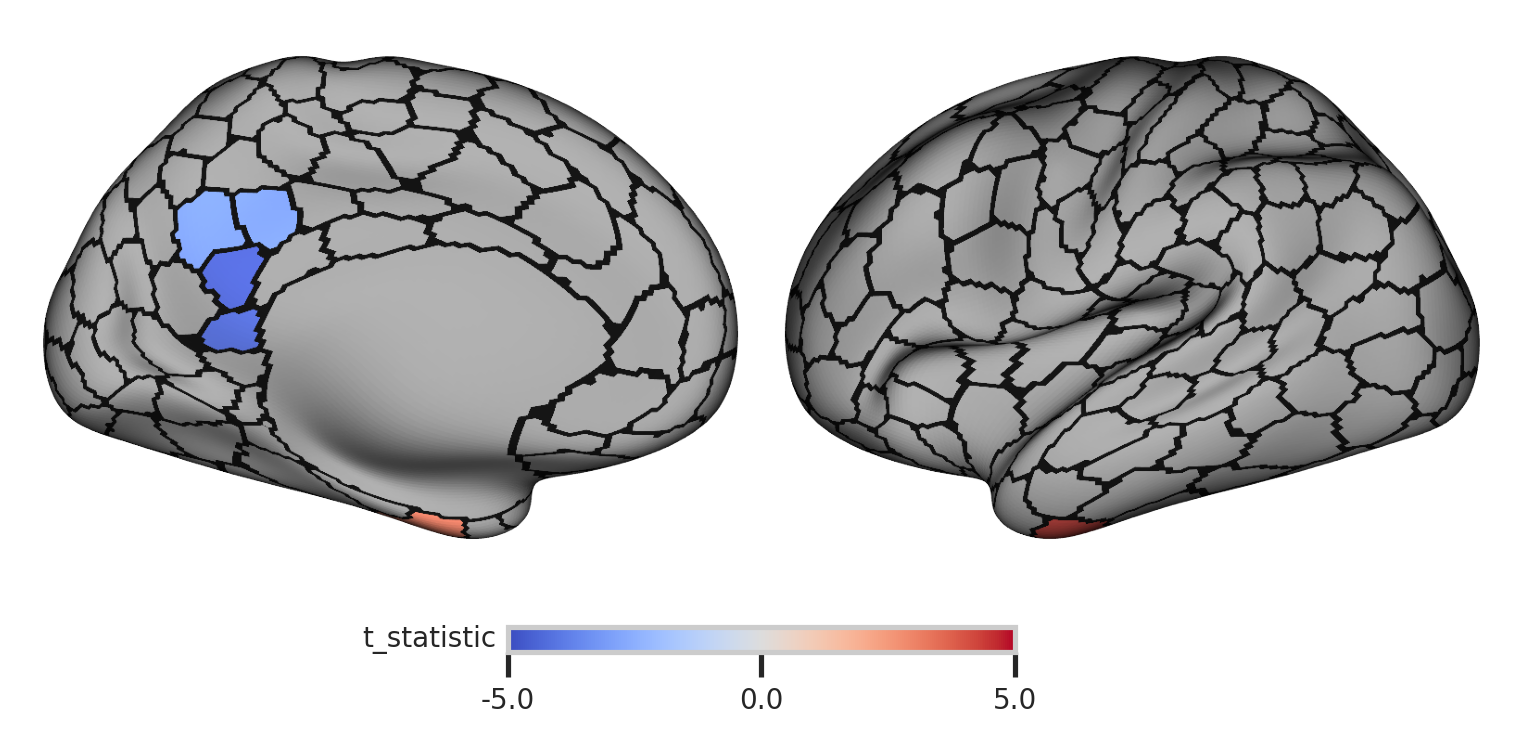

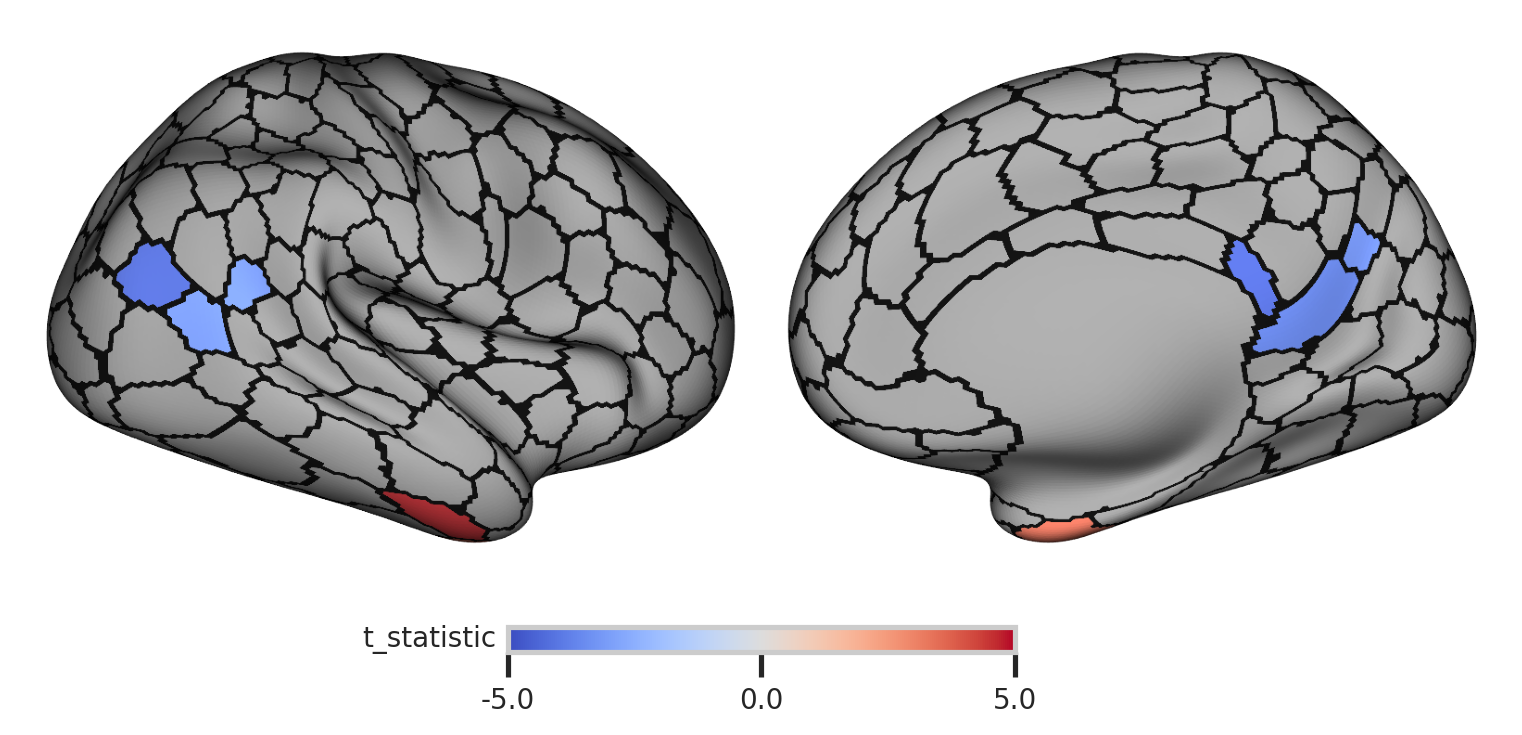

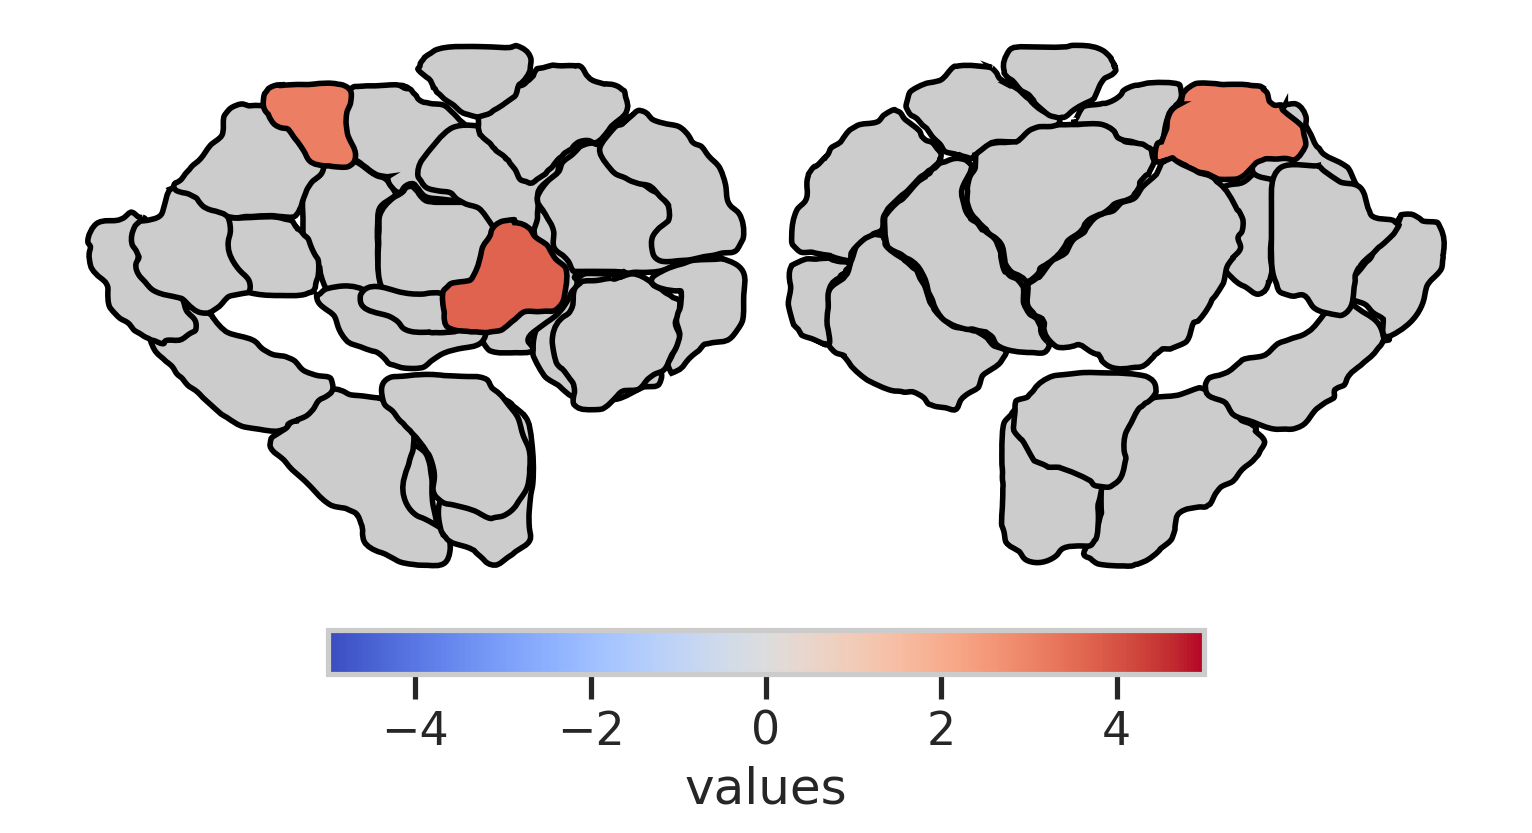

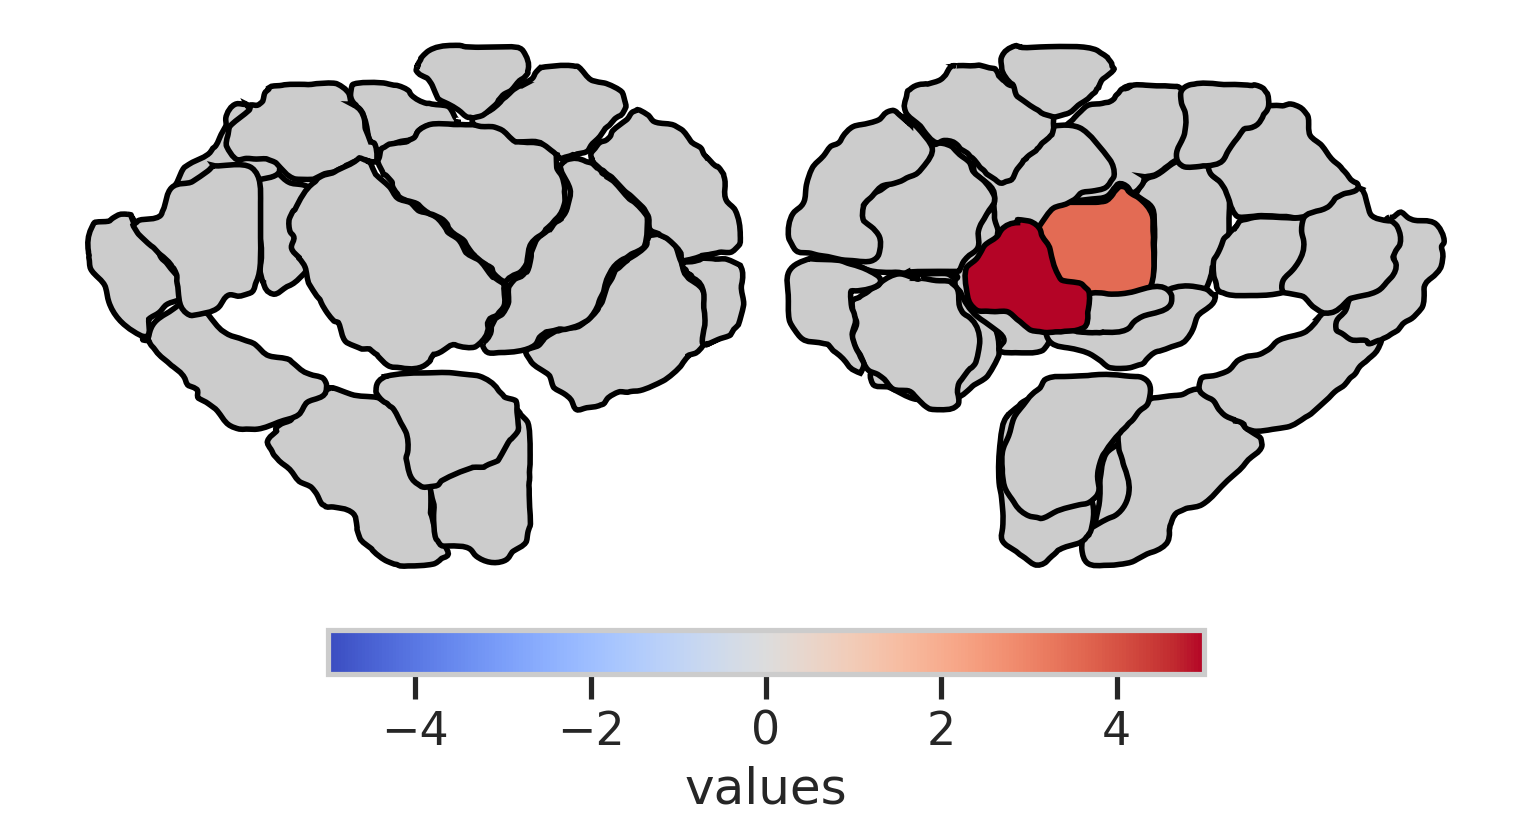

In [13]:
custom_output_dir = output_dir / "custom_analysis" / metric_key
custom_output_dir.mkdir(parents=True, exist_ok=True)

brain_plotter.plot_single_metric(
    results_df=results_df,
    metric_key=metric_key,
    output_dir=custom_output_dir,
    p_column="adjusted_p_value",
    value_column="t_statistic",
)

print(f"Custom visualization saved to: {custom_output_dir}")

## Summary

This refactored approach provides:

1. **Modularity**: Each component has a single responsibility
2. **Reusability**: Functions can be used independently or combined
3. **Maintainability**: Code is organized and documented
4. **Flexibility**: Easy to modify parameters or add new comparisons
5. **Reproducibility**: Consistent configuration and error handling

The original notebook functionality is preserved while providing a cleaner, more professional codebase.